# Linear least-squares regression

## Data

A data fit problem involves two sets of variables:

- A set of independent variables X
- A set of dependent variables Y

Let us start with the following data for X and Y:

In [1]:
import numpy as np
xdata = np.array([-0.18, -0.14, -0.1, -0.06, -0.02,  0.02,  0.06,  0.1,  0.14])
ydata = np.array([2.243, 2.217, 2.201, 2.175, 2.132, 2.116, 2.083, 2.016, 2.004])

We defined X and Y data as numpy arrays of 9 elements. The X and Y variables have completely different meanings, while the elements of X have fixed values, the elements of Y are random variables. 

A least-squares fit assumes that each element of Y follows a *normal distribution*, $y_i \sim \mathcal{N}(\mu_i, \sigma_i)$, where $\mu_i$ is the mean of the distribution, while $\sigma_i$ is its standard deviation. While the means $\mu_i$ are adjusted during the fit, the corresponding standard deviations $\sigma_i$ are known:

In [2]:
ysigma = np.array([0.008, 0.008, 0.01, 0.009, 0.011, 0.016, 0.018, 0.021, 0.017])

## Fit model 

We model the means $\mu_i$ with the function: 

In [3]:
def fit_model(x: np.array, par: np.array) -> np.array:
    return par[0] + par[1] * x

The first argument of this function is a numpy array with the independent variable X, and the second one is another numpy array containing the unknown parameters to be estimated during the fit. Since the model function is linear in the fit parameters, this special case is referred to as a *linear least-squares* regression.

To ensure the smooth processing by LikeFit, the fit model has to be vectorized in x. This means the model function has to accept a one-dimensional array containing n values of x and return an array with n values of the fit model. 

## Fitter construction

As the dependent variable Y follows a normal distribution and the fit model is linear in the fit parameters, we select the LinearLeastSquares fitter. We load the data and the fit model in the fitter but do not fit yet:

In [4]:
import likefit
fitter = likefit.LinearLeastSquares(xdata, ydata, fit_model, ysigma)

## Fit the data

We now run the fitter:

In [5]:
fit_status = fitter.fit()
print(fit_status)

0


We ensured that the fit is successful by checking that the fit method returned 0.

## Fit results

All the results are stored internally within the fitter object after running the `fit` method. We print a summary of the fit results:

In [6]:
fitter.print_results()

Fit summary
Estimators: [ 2.1192891  -0.72690669]
Errors: [0.00490906 0.04111108]
Covariance matrix: [[2.40988624e-05 1.34418437e-04]
 [1.34418437e-04 1.69012059e-03]]
Correlation matrix: [[1.         0.66604216]
 [0.66604216 1.        ]]
Chi square: 7.115277528888212
Degrees of freedom: 7
Pvalue: 0.41697680682713667


Different fit results can be retrieved from the fitter. For example, we get the estimators and their errors and print them in a nice format: 

In [7]:
estimators = fitter.get_estimators()
errors = fitter.get_errors()
print(f"Intercept: {estimators[0]:.4f} ± {errors[0]:.4f}")
print(f"Slope: {estimators[1]:.3f} ± {errors[1]:.3f}")

Intercept: 2.1193 ± 0.0049
Slope: -0.727 ± 0.041


We also report the correlation coefficient between the estimators of the two fit parameters. We pick up the correlation coefficient from the correlation matrix:

In [8]:
correlation_matrix = fitter.get_correlation_matrix()
correlation_coefficient = correlation_matrix[1,0]
print(f"Correlation coefficient: {correlation_coefficient:.2f}")

Correlation coefficient: 0.67


We finally evaluate the goodness of the fit with a chi-square test:

In [9]:
degrees_of_freedom = fitter.get_ndof()
print(f"Degrees of freedom: {degrees_of_freedom}")
chi_square = fitter.get_chi_square()
print(f"Observed chi-square: {chi_square:.1f}")
pvalue = fitter.get_pvalue()
print(f"Pvalue: {pvalue:.2f}")

Degrees of freedom: 7
Observed chi-square: 7.1
Pvalue: 0.42


The pvalue is far from zero meaning that the fitted model is consistent with the data.

## Fit plot

LikeFit provides a method to display a basic fit plot. In addition to the data and the fit, the plot also shows the error band of the fit: 

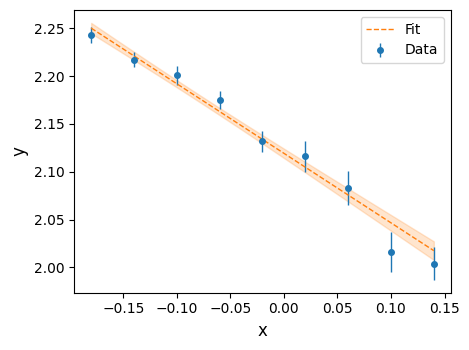

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fitter.plot_fit(ax=ax)
fig.savefig("linear_least_squares.svg")

The use of the optional argument ax of the method `likefit.LinearLeastSquares.plot_fit` allows saving the plot to a file.

Customized plots of the fit can be generated by accessing the fit resuls.    